# Capstone proposal - Deep Learning for Lepus

## The problem to be solved

### (a) What are the main project idea and goals?

By thinking about the capstone project, one emerged when discussing with prof. Yves Hausser from the nature management department at hepia (HES-SO Geneva) about a deep learning project of natural images. As follows, an introduction of this project is presented:

The Lepus software [1] was designed to help scientists analyze wildlife images acquired using photographic traps. At present, species recognition and individual identification are carried out manually, which is very time-consuming. Note that, to get the data, local people have to access to these cameras and are present on some images. Thus, humans are also a category in itself and must be classified correctly.

The objective of this project is to test Deep Learning technology to automate certain tasks such as

1. detecting the presence or not of an animal/human in the image
2. locating animals/humans using bounding boxes 
3. identifying certain species given a fixed taxon level
4. ideally, identify each individual animal of a specific species with respect to physical characteristics (e.g. to help the Wild Life Conservation Society) e.g. [Computer Vision for Wildlife Conservation (CVWC)](https://arxiv.org/pdf/1906.05586.pdf)

Each of these problematics can be independent and with another Extension EPFL school learner (*Julien Smets/Blerim Arslani*), we decided to share this project. Here is the chosen configurations for our specific capstone projects:

**Project 1** *Blerim Arslani : Detection of the presence of an animal/human in the image (binomial classification)*

**Project 2** *Julien Smets : Identification of the type of an animal/human in the image (multnomial classification)*

Please let us shortly motivate our choice. By solving these two problematics, the saved time for nature management scientists could be very high (days of work), especially for the presence detection problem because only a small amount of images contains animals (this will be more deepely detailed below).
Moreover, the labelled data do not include the bounding boxes which excludes the second project (here we consider only supervised learning to ensure a validation metric) and the fourth one is limited to the significant inspection variance of the manual identification and the very low amount of data available. 

Note that these two chosen distinct projects are individual (will not be team-based and even the dataset will be different) and can be combined together by performing the second work right after the first one in order to classify the detected animals by assuming there is no empty images (cf. diagram as follow).

![Diagram of the project](images/drawioDiagram.png)

As follows, you can see the project cloud for more details: 

- [1] https://lepus.cloud

This project (#2) aims analysing and developping an accurate method for classifying species where there is always a species or human in the image. Since the species are represented with serious irregularly, the first question asked is: what is the best method for handling the data imbalancing. To this end, an analysis of the effects of the data balancing techniques the will be performed.

In a second question mark, which learning model is the best to solve our problematic. To answer it, some test of models will be performed with different optimization parameters. 

As a final challenge to define the best method, some additional information will be used with ML classification techniques to further improve prediction results. This part will require some EDA using data manipulation techniques and feature engineering.

### (b) What story you would like to tell with the data and what would you like to achieve at the end?

In this second project, the aim is to classify correctly a group of animal species with the assuption that there is always an animal in the image. To this end, the idea is to:
- Display, analyse and expore the data.
- Select potential usefull information for the objective and discuss potential issues.
- Determine experiments to use this information for best accuracy possible.
- Validate this experiments to obtain a powerfull model for animal identification.

### (c) What is the main motivation behind your project?

The main idea following Lepus project is to reduce the high time consuming manual detection, localization and identification of animal species in photographic traps. 

## The data set

### (a) What is the size and format of the data that you plan to use?

#### *Data information*
The given species can be very small depending on the animal size and its distance to the camera or very large taking a large part of the image. Animals can be **occluded** by background objects (trees) of even be **partially viewed** (especially for large animals such as giraffes or elephants). In rare cases, it is possible to have more than one individual or more than one species in some images. The amount of species are in proportion irregular depending on the rarity of these species. Moreover, a majority of the given images doesn't contain any animals due to trees movement, dust tornado, butterflies, etc causing false positive captures. The proportion of empty pictures are **~60-85%** depending on the device environment.

In addition, cameras have many different fields of view (FOV) and resolutions including RGB and graylevel images. The latter comes from the difference between day and night acquisition devices. Note that this results to **highly non uniform representation of species** w.r.t. different situations (day/night, background situation, etc.). As an example some species are only nocturne. 

Some of the images are time correlated due to animals running and get captured several times, i.e. **small timelaps images**. These set of images are already grouped by the Lepus software. These grouped images are called **independent capture event (ICE)** and numbered from 3 up to ~300 if an animal stays in front of the camera a long part of day/night.

#### *Labels and other information*
The labels and other images information are stored in a **CSV** file.


In [2]:
import pandas as pd
csv_file = '../data/DeepLearning/DeepLearningExport.csv'
data = pd.read_csv(csv_file)
data.sample(frac=1).head()

,file_id,file_path,session_dir,file_datetime,file_period,event_id,prev_file_id,session_id,place_id,taxon_id,taxon_tsn,taxon_name
2212,2215,2015/M1/M1_25/03240535.JPG,M1 2015,24.03.15 12:21,day,235,2214.0,5,16,NaN,NaN,NaN
547,550,2015/M1/M1_21/03250415.JPG,M1 2015,24.03.15 21:07,night,134,NaN,5,12,5,NaN,Bdeogale crassicauda
2311,2314,2015/M1/M1_25/03240634.JPG,M1 2015,24.03.15 13:56,day,235,2313.0,5,16,NaN,NaN,NaN
1547,1550,2015/M1/M1_25/03210869.JPG,M1 2015,21.03.15 13:26,day,221,1549.0,5,16,NaN,NaN,NaN
3519,3522,2015/M1/M1_35/03100038.JPG,M1 2015,10.03.15 11:42,day,481,3521.0,5,23,NaN,NaN,NaN


where columns means:
* flie_id [unique integer]: the identifier (ID) of the file
* file_path [string]: the path of the file image of structure "{year}/{grid}/{camera}/{picture}"
* session_dir [string]: the directory name of the file (called session)
* file_datetime [timestamp]: the date time of the file
* file_period [nominal/cyclic ordinal]: the period of the file (day/night/twilight)
* event_id [integer]: ID of the independent capture evenment (ICE)
* pred_file_id [float (integer+NaNs)]: ID of the previous file deduced from event with the same ID
* session_id [integer]: ID of the session
* place_id [integer]: ID of the camera's location
* taxon_id [float (integer+NaNs)]: Id of the taxon (i.e. species or lower in animal ranking)
* taxon_tsn [float (integer+NaNs)]: ID of the world official tsn (taxonomic serial number)
* taxon_name [string]: common name of the taxon present in the image

#### *Images*
The data set is given as image files separated in several folders and subfolders. These folder are classified by year/grid/camera/picture where a grid correspond to a set of 36 cameras (6x6). 

For the moment we have only one grid "M1 2015" (~2.5Gb) containing 4056 color and grayscale images with 518 (~12%) containing animals or humans. Since this amount of data is not enough for the project, a larger amount will be recieved soon. The total dataset represents a covered area of 10'000 km 2  with hundred of cameras placed in different nature spots in Tanzania. The entire dataset consist of **179k** color and grayscale images (**~99.5Gb**). All these cameras are placed in different nature spots in Tanzania. This data has been obtained since 2013 and until 2018 (more recent data remains unlabelled). 

![Examples of images from the M1 2015 dataset.](images/imagesExamplesSeed3.png)

![Examples of images from the M1 2015 dataset.](images/imagesExamplesSeed4.png)

### (b) How do you expect to get, manage and process the data?

### *Recieving the data*
The data is shared by physical transfer in order to conserve privacy.

### *Preparing the data*

Since the whole data is shared, as a first step, the data will be cleaned and only images containing species or humans will be kept. This will be done by cleaning the CSV file. Some humans have different taxon_name (e.g. [TEAM], TEAM, etc.). Some species have different names since they are named with their full taxon name (e.g. Genetta angolensis, Genetta maculata, Genetta sp., etc.). Checking of formats and values of the data (nominal, ordinal and timestamp, ...). 

In a second step, the data will be grouped by labels (species names). This allows to compute the labels proportions and other statistics such as the proportion of day/night/twilight images w.r.t. species. 

Feature engineering will be performed to how use day/night/twilight as powerfull information for prediction.

The final step consists of extracting IDs (file_path), labels (taxon_id) and maybe other additional information depending on the methods proposed.

### *Exploratory data analysis*

#### Data imbalancing
Due to the location and the environment of photographic traps in addition to the different rarity of species, the distribution of the class can be significantly imbalanced (see figure as follows).

![Example of data imbalancing on a grid (M1 2015) with 518 species or humans.](images/dataImbalancing.png)

In the context of species identification, the **data imbalancing** is an important issue. Indeed, if the data is used as is, the importance of very common speices can be significantly overestimated. As an example the perfect identification of a given species representing 80% of the data set results of an accuracy of 80% no matter how precise it is on other species. As a first step data imbalancing will be experimented.

#### Handle very rare species
In case of insufficient amount of images containing some of rare species, the issues related and solutions will be determined after analysing the entire dataset. At this point, rare species can be:

* ignored if present with negligible amount
* grouped in a "rare species" class label

These two first possible solutions have their own drawbacks. Indeed, ignoring species, and thus ignoring some classes results in 100% misclassification of these rare species. Grouping rare species in a single class can lead to trouble for determining features shared by these features and can result to low ability to classify them. This will be deepended in the project's work.

#### Additionnal information
The information of animals lifestyle is a usefull assuption used by scientists to identify species in practice. Since the camera traps are well located and include **timesteps, the day, night and twilight** can be known (see below for further details). This can also be used by adding this knowledge to infer the classification (cf. following figure). To this end, an additional experiment will be performed to determine if this information can be interesting and how it could be for the context of species classification.

![Example of day/night/twilight information on a grid (M1 2015) with 518 species or humans.](images/speciesDayNightTwilight.png)

Lets try computing the correlation between the taxon_id and the file_period. As shown below, there is a correlation (negative still is significant) of the file_period. 

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

data_clr = data.dropna(subset=['taxon_id'])
data_clr = data_clr.loc[:,['file_period','taxon_id']]
data_clr['file_period'].replace({'day': 1,'twilight':0, 'night':-1}, inplace=True)
data_clr.replace('Team',-1, inplace=True)
data_clr.taxon_id = pd.to_numeric(data_clr.taxon_id, downcast='float')

corrmat = data_clr.corr()
print('file_period and taxon_id correlation : {:.3f}'.format(corrmat.loc['file_period','taxon_id']))

file_period and taxon_id correlation : -0.330


Lets now try to show the distribution of day/night/twilight for each species ID.

file_period
-1    AxesSubplot(0.125,0.125;0.775x0.755)
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

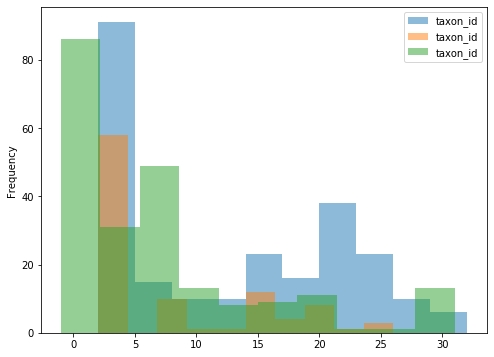

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
grp.plot(kind='hist', alpha=0.5, ax=ax)

As the figure shows, the density of day/night/twilight images are different w.r.t. animal species. Although all these figures were comupted using only one grid, this information is relevant are more advanced EDA are planned one the entire dataset to clearly show how it is possible to use this feature for classification.

As an other potential informative feature, the information of timelaps images can also be an informative by looking to different timelaps images, it is possible to see species moving. In a special case, the difference between these images can especially show their presence or not (cf. following figure). 

![Example of timelaps images and their difference from the M1 2015 dataset.](images/timelaps.png)

For this reason, this information will mostly impact the presence detection of species and will not being tested in this project. Note that this can be experimented in future improvment.

#### *Data pre-processing*

Images also needs processing. First of all, image will be normalized:
- resize each images by downsampling the large input image into an adapted smaller shape. This will be performed empirically to balance between complexity and information loss.
- normalize pixel intensities. In this case, in addition to 0-1 scaling, an adaptative contrast adjustment (CLAHE from cv2) will be computed to adjust contrast and enhance locally the visibility of hidden (dark) species. Note that it also enhance the noise in low contrast areas. 

#### *Data augmentation*

The animal often represent a sub part of the image, this can induce backgroud learning instead of the animal. To reduce this by adding some variance to the data, some data modification is needed such as noise addition, horizontal flip, rotations or shear. Other potentially usefull methods but problematic will not be used because they could remove small species such as cut out or cropping.

In the need of data augmentation, several processing are considered:
- denoising. Dealing to eventual noise (e.g. due to CLAHE), it is possible reduce it by smoothing (using Gaussian kernel) and ensure the model learning denoised data.
- image perturbations. Some rare species can eventually be underepresented. To tackle this issue, augmentation of the data using rotation, translation, etc. can be used (ImageDataGenerator from keras).

#### *Additional information processing*
The additional data of the day/night/twilight is cyclic. Similarly to time data, it is possible to ensure locally constant difference by encoding them as day:1, twilight:0 and night:-1. This allows day and night being the highest difference possible. This idea will be analyzed in EDA over the entire dataset.

## The analysis and methods

### (a) What are the main challenges that you envision for completing the project and how do you plan to get around each one?

#### *A. Data Imbalacing*

For for the seek of best identification model, it is needed to experiment the best methods to train our model. To this end, the project will include an analysis in order to determine the best way to use our data. A comparison will be preformed between:
1. unbalanced data 
2. partially and fully balanced data using:
    * Undersampling: resample our majority classes with randomly subset selection
    * Oversampling: copy the minority classes images using different and small transformations (rotation, noise, blur, gray-level versions, etc.)
    * Changing the *class_weight* in the model training
3. if not enough amount of images for rare species, create a group of rare species.


#### *B. Transfer Learning, models structures and trainings approaches*

Instead of training on a randomly initialized model, it is common to perform transfer learning on a large challenging task pre-trained model (e.g. 1000-class [ImageNet](http://www.image-net.org/)). In addition of reducing the time of training, it also helps generalization [this paper](https://arxiv.org/pdf/1411.1792.pdf). To experiment this, the following training will be performed:
1. without transfer learning (same structure with randomly initialized weights)
2. by fine-tuning (and freezing the other layers) with transfer learning on:
    1. the last fully connected layers (this assumes the source and target domains are the same) and use the model as feature extractor.
    2. on additionnal last layers (to be more task specific if both domains are different)

For transfer learning, one very promising model has recently been published, on June 10th 2019, and shared, on [tensorflow](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet), by Google Research called [EfficientNet-B0](https://arxiv.org/pdf/1905.11946.pdf). This model can be scaled depending on the computer learning capability and has already been trained on 1000-class [ImageNet](http://www.image-net.org/). This can be an ideal starting point for this project.

Note that since it is also possible to experiment several other classifiers (e.g. decision tree, logistic regression, random forest, SVM, etc.), for the sake of simplicity the models will be trained only using dense layers.


#### *C. Additional Information as Improvment using Machine Learning*


Since the photographic traps are precisely located with timestamp, there is the information of solar elevation angle, thus the time of the day (day, night, twilight), which can be a powerfull information because certain species have specific lifestyle. The following experiments will be tested to compare the accuracy between the basline CNN model:
1. without additional information
2. with concatenating directly the first fully connected (fc) layer with the information of (day, night, twilight)
3. with concatenating the solar elevation angle (computation allowing day/night/twilight changes at the approximate same time) using different machine learning methods:
    * decision tree
    * logistic regression
    * random forest
    * SVM
    * dense (fc) layer

The solar elevation angle should give more information since it is a (cyclic) continuous variable, in contrary to day,night,twilight which is a (cyclic) nominal feature.

The following example shows the structure of the data concatenaton (e.g. here with fc layers).

![Example of the additional information utilisation as improvment on a grid (M1 2015) with 518 species or humans.](images/CNN_additional_data.png)


### (b) What the are steps that you plan to take to achieve the end goals?

The steps of the work are given as follow:

1. Data **loading, cleaning and manipulation** for preparation.

2. **Preprocess** the dataset using EDA and known preprocessing steps.

3. **Split** it in train, validation and test sets.

4. Select an adapted model and use **transfer learning** for our application.

5. Train it and compute its accuracy measure. Define it as the **baseline model**.

6. **Experiment** the main challenges, validate them and test the performance of the proposed models using
    * A. data imbalance.
    * B. different model structures and trainings.
    * C. additionnal information as classification improvment.


7. **Combine** best results of A, B and C to obtain a final model. Validate and test it.



### (c) Show us that you have a pipeline in place and that you understand the feasibility of your project goals.

#### *1. Data Loading, Cleaning and Manipulation:*
- Load CSV file and get images pathnames in several folder and subfolders using recusrive search.

- Clean data by removing unlabelled data and any without species in it.

- Manage the remaining data for easy access and processing (e.g. flow from directory).

#### *2. Images Preprocessing:*
- Preform EDA to determine best methods for using the images and the additional information (day/night/twilight).

- Select state of the art preprocessing methods adapted to our problematic (e.g.**\*** histogram equalisation, denoising, resizing, data augmentation such as noise, horizontal flip, rotations or shear).

- Implement them and make them easy to use such as with flow from directory.

*\*based on iWildCam 2019 challenge [Top7 report](https://github.com/Walleclipse/iWildCam_2019_FGVC6/blob/master/iwildcam_2019_report.pdf).*

#### *3. Spliting the data:*
- Separate the data into a stratified train/validation/test sets in order to conserve the labels (species) proportions and enviroment proportions, thus by keeping its global imbalance. This will be balanced or not depending on the experiments.

#### *4. Transfer Learning:* 
- Select a state of the art pretrained model.

- Adapt the structure to our problem by adjusting last layers to fit our desired output.

#### *5. Baseline model:*
- Train the adapted model on our dataset.

- Validate the pre-trained model.

- Set this trained model as the baseline for our future experiments.

#### *6. Experiments for our final goal:*
- A. Experiment data imbalacing to set the best preprocessing method for training.

- B. Apply transfer learning, models structures and trainings approaches in order to improve the learning rate and/or the test accuracy.

- C. Use additional information to try to further improve the final accuracy. 

#### *7. Obtain our final model by comining best results:*
- Use the knowledge learned by all the experiments to define a final model and compute its accuracy.

## The communication

The code sample will be implemented in several python scripts (.py) for convenience and simplicity (e.g. separation of pre-processing, training and testing). An additional notebook (.ipynb) will be included with analysis details and visualization figures as a small report (similarly to this document).

#### *Contribution of the proposed project*

The proposed project of classifying animal species in images containing always at least one species. This work will differ on several points w.r.t. the state of the art [1,2].

To obtain the top3 private score in iWildCam2019, [1] used a model ensemble of Inceptionv3, ResNet152, and InceptionResnetv2 and majority voting for classification. Moreover, they focused on methods for classifying and locating animals presence and absence in images (using DL [1] or image processing [2]) where the proposed project ignores this and assumes this is already performed. All these points will not be performed to focus on different points:

* data imbalancing which was not experimented and analzed precisely.
* using the entire image instead of a crop centered on the species.
* concentrating the utilization on additional data information (e.g. day/night/twilight) thing they not used.
* applying only one model instead of optimizing the accuracy exclusively using the input images.

#### *References:*

- [1] https://github.com/HayderYousif/iwildcam-2019-fgvc6, Github link.
- [2] Yousif, Hayder, et al. "Animal Scanner: Software for classifying humans, animals, and empty frames in camera trap images." Ecology and Evolution (2019).

#### *Others*

Note that the data can need to be confidential with a DNA (standard Non-Disclosure Agreement) due to some very rare species which are often hunted for money. If this is the case, it will be demanded to the EPFL soon. But anyways the precise location of the picture will not be transmitted. 